In [23]:
#importing the required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Getting the dataset 
fifadata = pd.read_csv("C:/Users/mural/OneDrive/Documents/fifadataset.csv")



In [24]:
#To observe the dataset
fifadata.head()

#To get the understanding of the dataset
fifadata.describe()
# we observe that there are some missing values in datase

#To get the total number of unique players in the dataset
fifadata.ID.nunique()


18207

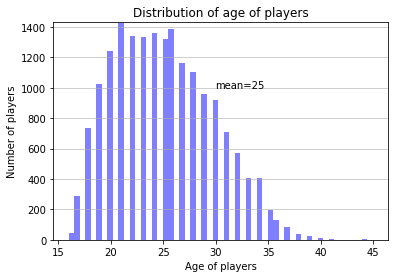

In [8]:
#Observing the distribution of age over players

n, bins, patches = plt.hist(fifadata.Age, bins='auto', facecolor='blue', alpha=0.5)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age of players')
plt.ylabel('Number of players')
plt.title('Distribution of age of players')
plt.text(30,1000, r'mean=25')  # mean can be get from above cell queries
maxfreq = n.max()

# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

# we obsereve that age is normally distributed and Mean of age is 25 years 
# We observe that maximum players are below 35 years 

In [9]:
# To check what % of the players are above 35 years

c=0
for x in fifadata.Age: 
        # condition check 
        if x>= 35:
            c+= 1 
(c/18207)*100

# we observe that ~3% of players are above 35  years, hence it is safe to exclude in our further analysis

2.685780194430713

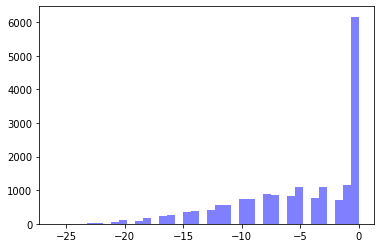

In [25]:
# To observe that how overall score is different from the potential score of playesr

n, bins, patches = plt.hist((fifadata.Overall-fifadata.Potential), bins='auto', facecolor='blue', alpha=0.5)

# We observe that Overall score is almost similar to potential score.Hence we can consider only overall score
# in our analysis instead of considering both

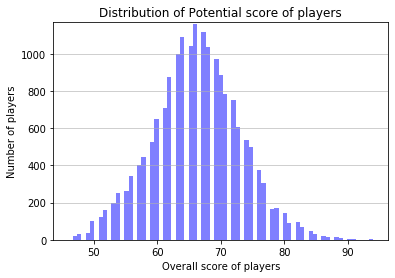

In [11]:
# To see how the overall score is distributed over the players

n, bins, patches = plt.hist(fifadata.Overall, bins='auto', facecolor='blue', alpha=0.5)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Overall score of players')
plt.ylabel('Number of players')
plt.title('Distribution of Potential score of players')
maxfreq = n.max()

# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

# We observe that Potential score is normally distributed over the players

In [13]:
# We observe in above graph that most of the players are having Overall score in between 55 to 75
# To observe what % of players are falling under the range of 55 to 75

c=0
for x in fifadata.Overall: 
        # condition check 
        if x>= 55 and x<= 75: 
            c+= 1 
(c/18207)*100

# We observed that ~86% of players have recieved overall score from 55 to 75

86.2909869830285

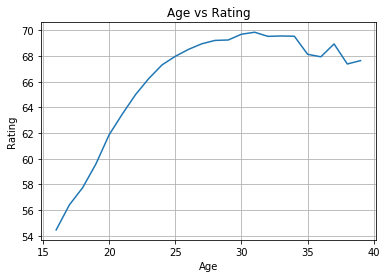

In [15]:
# To observe the trend between Age and Overall score of the players

# There are 18,207 players and each player wil ahve different age and score , so we can aggregate the Overall score of players 
# by their age
aggregated_data=fifadata[fifadata['Age'] < 40].groupby('Age')['Overall'].mean().reset_index()


# To get the graph between age and overall score of the players
fig,ax=plt.subplots()
ax.plot(aggregated_data['Age'],aggregated_data['Overall'])
ax.set(xlabel='Age',ylabel='Rating',title='Age vs Rating')
ax.grid()
plt.show()

# We observe that as Age is increasing from 15 to 30 , the overall score is also increasing .
# Form age 30 we are observing a decline trend in the score

In [17]:
# To observe in the top 5 countries which contains maximum number of players

a=fifadata[fifadata['Age'] < 35].groupby('Nationality')['ID'].nunique().reset_index()
a.nlargest(5, 'ID')

# We need to check teh top countries which have players with maximum overall score ---pending

,Nationality,ID
46,England,1619
59,Germany,1185
138,Spain,1042
55,France,893
6,Argentina,883


In [18]:
# We observe that Height is in ft and in string format
# To convert the height into cms and in float type, create a function

def feet_cms(x):
    if str(x)!='nan':
        x = str(x).split("'")
        if len(x)>1:
            return float(int(x[0])*30.48+int(x[1])*2.54)
        else:
            return float(int(x[0])*30.48)
    else:
        return np.nan

# To call the above fucntion on your data    
fifadata['Height']=fifadata['Height'].astype(str).apply(lambda x:feet_cms(x)).astype(float)

# To observe the data 
fifadata['Height'].describe()


count    18159.000000
mean       181.257584
std          6.730145
min        154.940000
25%        175.260000
50%        180.340000
75%        185.420000
max        205.740000
Name: Height, dtype: float64

In [19]:
# To check the number of null values in Height column
fifadata['Height'].isna().sum()

# to replace the null values with the mean height of the players
fifadata['Height']=fifadata['Height'].fillna(fifadata['Height'].mean())

# To observe the data
fifadata['Height'].describe()


count    18207.000000
mean       181.257584
std          6.721268
min        154.940000
25%        175.260000
50%        180.340000
75%        185.420000
max        205.740000
Name: Height, dtype: float64

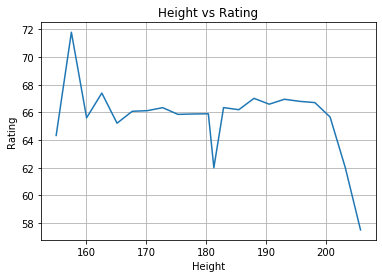

In [20]:
# To check how the Height affects the Overall score of players

# There are 18,207 players and each player wil ahve different age and score , so we can aggregate the Overall score of players 
# by their height

aggregated_data2=fifadata.groupby('Height')['Overall'].mean().reset_index()
fig,ax=plt.subplots()
ax.plot(aggregated_data2['Height'],aggregated_data2['Overall'])
ax.set(xlabel='Height',ylabel='Rating',title='Height vs Rating')
ax.grid()
plt.show()


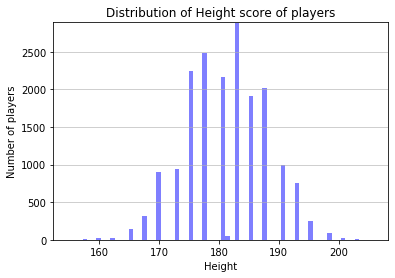

In [21]:
# To check the distribution of height over the players

n, bins, patches = plt.hist(fifadata.Height, bins='auto', facecolor='blue', alpha=0.5)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Height')
plt.ylabel('Number of players')
plt.title('Distribution of Height score of players')
maxfreq = n.max()

# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()


In [26]:
# The weight column is in string format and has 'lbs' with it
# To remove lbs from the data and to convert the weight in float 

fifadata['Weight']=fifadata['Weight'].str.replace('lbs','').astype('float')


In [27]:
# To check the null values in Weight column
fifadata['Height'].isna().sum()

# to replace the null values with the mean height of the players
fifadata['Weight']=fifadata['Weight'].fillna(fifadata['Weight'].mean())

# TO observe thd data
fifadata['Weight'].describe()

count    18207.000000
mean       165.979129
std         15.572775
min        110.000000
25%        154.000000
50%        165.000000
75%        176.000000
max        243.000000
Name: Weight, dtype: float64

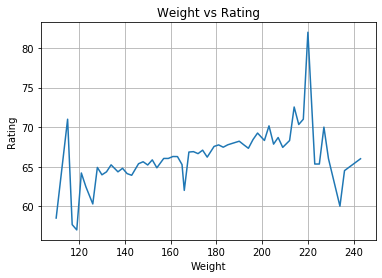

In [28]:
# To check how the weight affects the Overall score of players

# There are 18,207 players and each player wil ahve different weight and score , so we can aggregate the Overall score of players 
# by their weight

aggregated_data2=fifadata.groupby('Weight')['Overall'].mean().reset_index()
fig,ax=plt.subplots()
ax.plot(aggregated_data2['Weight'],aggregated_data2['Overall'])
ax.set(xlabel='Weight',ylabel='Rating',title='Weight vs Rating')
ax.grid()
plt.show()

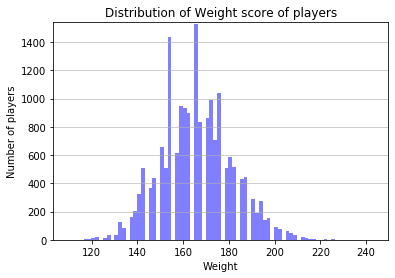

In [29]:
# To check the distribution of height over the players
n, bins, patches = plt.hist(fifadata.Weight, bins='auto', facecolor='blue', alpha=0.5)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Weight')
plt.ylabel('Number of players')
plt.title('Distribution of Weight score of players')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()


In [30]:
pwd()

'C:\\Users\\mural'